# Decision Tree

Decision tree models are a type of supervised machine learning algorithm used for classification and regression tasks. They work by recursively splitting the data into subsets based on feature values, creating a tree-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome or class label.

## Dataset

Our dataset,

| Outlook | Temperature | Humidity | Windy | Play |
| :--- | :--- | :--- | :--- | :--- |
| sunny | hot | high | false | no |
| sunny | hot | high | true | no |
| overcast | hot | high | false | yes |
| rainy | mild | high | false | yes |
| rainy | cool | normal | false | yes |
| rainy | cool | normal | true | no |
| overcast | cool | normal | true | yes |
| sunny | mild | high | false | no |
| sunny | cool | normal | false | yes |
| rainy | mild | normal | false | yes |
| sunny | mild | normal | true | yes |
| overcast | mild | high | true | yes |
| overcast | hot | normal | false | yes |
| rainy | mild | high | true | no |

## Code

In [34]:
dataset = [
    ['sunny', 'hot', 'high', 'false', 'no'],
    ['sunny', 'hot', 'high', 'true', 'no'],
    ['overcast', 'hot', 'high', 'false', 'yes'],
    ['rainy', 'mild', 'high', 'false', 'yes'],
    ['rainy', 'cool', 'normal', 'false', 'yes'],
    ['rainy', 'cool', 'normal', 'true', 'no'],
    ['overcast', 'cool', 'normal', 'true', 'yes'],
    ['sunny', 'mild', 'high', 'false', 'no'],
    ['sunny', 'cool', 'normal', 'false', 'yes'],
    ['rainy', 'mild', 'normal', 'false', 'yes'],
    ['sunny', 'mild', 'normal', 'true', 'yes'],
    ['overcast', 'mild', 'high', 'true', 'yes'],
    ['overcast', 'hot', 'normal', 'false', 'yes'],
    ['rainy', 'mild', 'high', 'true', 'no']
]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

x = [row[:-1] for row in dataset]
y = [row[-1] for row in dataset]

x = pd.DataFrame(x, columns=['outlook', 'temperature', 'humidity', 'windy'])
y = pd.Series(y)

le = LabelEncoder()
for column in x.columns:
    x[column] = le.fit_transform(x[column])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.00%


In [52]:
test_data = pd.DataFrame([['sunny', 'cool', 'high', 'true']], columns=['outlook', 'temperature', 'humidity', 'windy'])
for i in test_data.columns:
    test_data[i] = le.fit_transform(test_data[i])

clf.predict(test_data)

array(['yes'], dtype=object)

## Plot

In [36]:
class_report = classification_report(y_test, clf.predict(x_test))
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [37]:
conf_mat = confusion_matrix(y_test, clf.predict(x_test))
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[1 1]
 [1 2]]


[Text(0.6666666666666666, 0.875, 'humidity <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = yes'),
 Text(0.5, 0.625, 'outlook <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = no'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'windy <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(0.75, 0.75, '  False')]

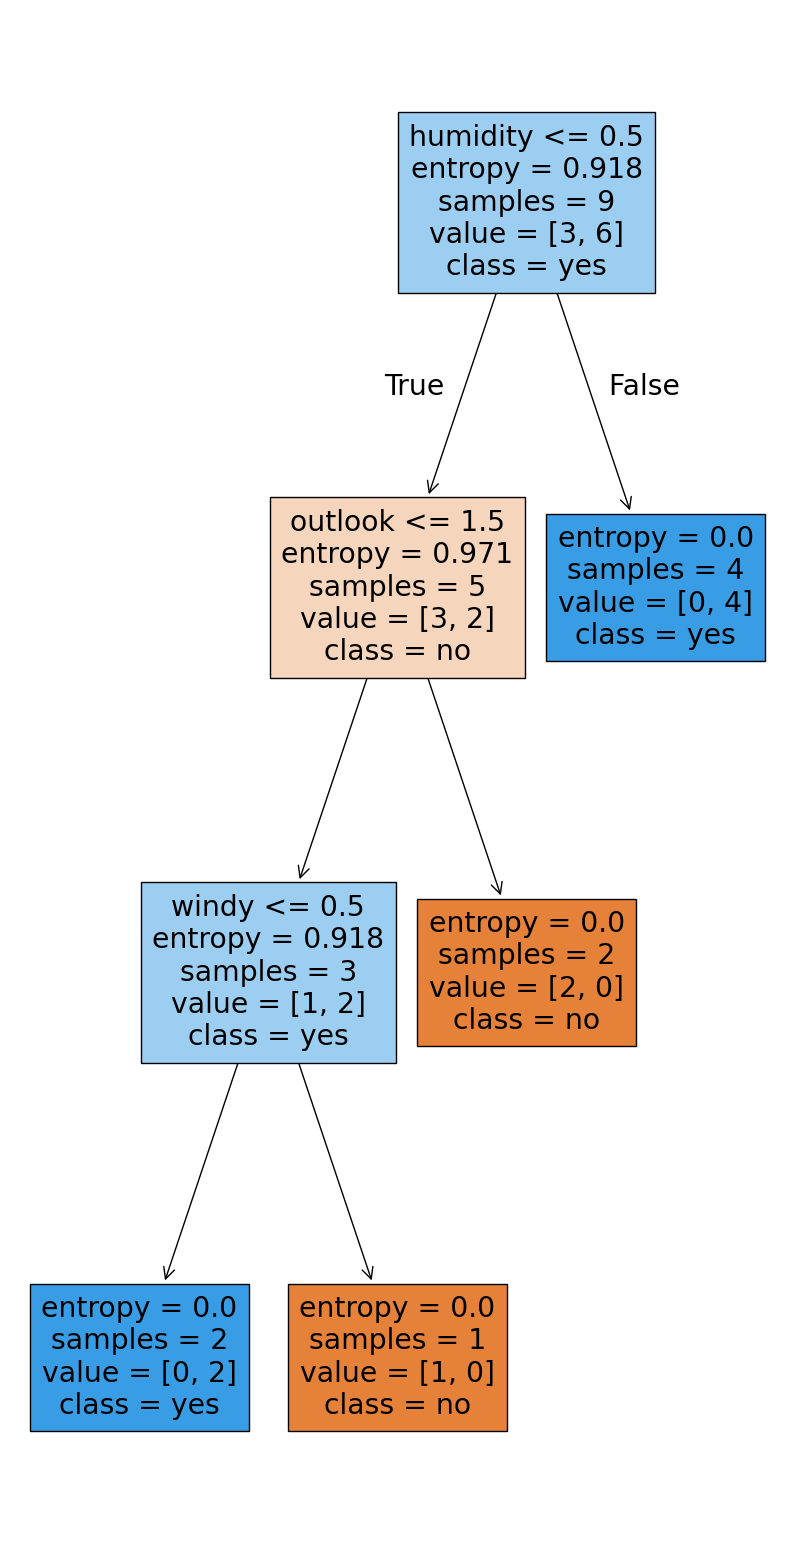

In [38]:
plt.figure(figsize=(10,20))
plot_tree(clf, feature_names=x.columns, class_names=clf.classes_, filled=True)